In [99]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [103]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [25]:
df.shape

(5572, 2)

In [32]:
ham_words=' '.join(df[df['Category']=='ham']['Message'].values)

In [33]:
ham_words

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if that\x92s the way u feel. That\x92s th

In [34]:
# which one is repeted most of the times we are going to create the plot
!pip install WordCloud

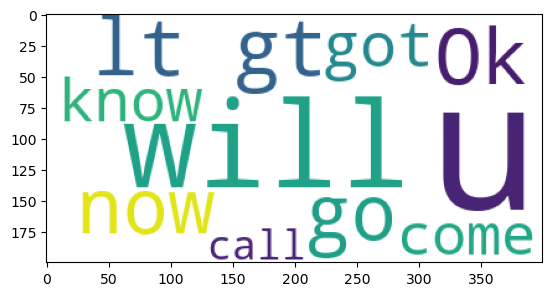

In [41]:
ham_plot=WordCloud(background_color='white',max_words=10).generate(ham_words) #no significance for the color
plt.imshow(ham_plot)

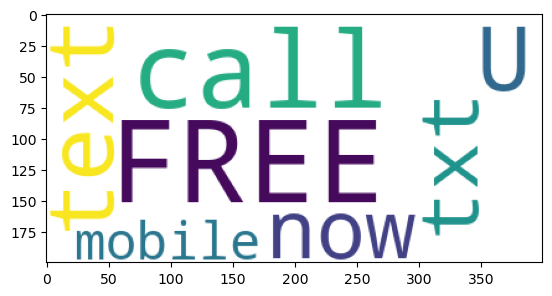

In [45]:
spam_words=' '.join(df[df['Category']=='spam']['Message'].values)
spam_plot=WordCloud(background_color='white',max_words=10,min_font_size=42).generate(spam_words) #no significance for the color
plt.imshow(spam_plot)

<Axes: xlabel='Category'>

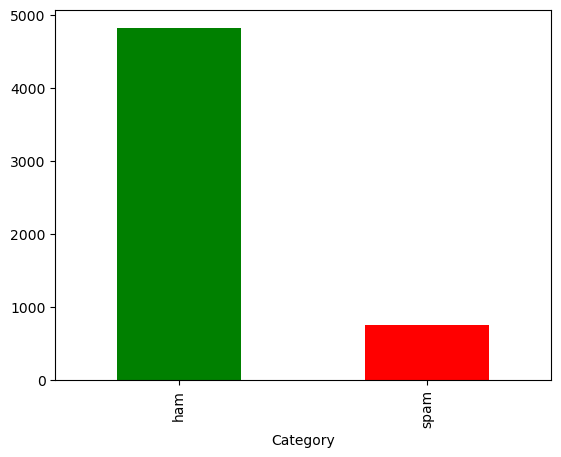

In [46]:
# how many spam emails are there and how many ham emails are there i the dataframe
df['Category'].value_counts().plot(kind='bar',color=['green','red'])

# Machine Learing Project

In [55]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Bag of words

In [121]:
bow=CountVectorizer(stop_words='english')

In [122]:
bow.fit(df['Message'])
x=bow.transform(df['Message']).toarray()
y=df['Category']

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=34)

# KNN

In [65]:
from sklearn.metrics import accuracy_score

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pre=knn.predict(x_test)
accuracy_score(y_test,y_pre)

0.9130044843049328

# Naive Bayes

In [108]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
y_pre=nb.predict(x_test)
accuracy_score(y_test,y_pre)

0.9874439461883409

# DT

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pre=dt.predict(x_test)
accuracy_score(y_test,y_pre)

0.9695067264573991

# SVC

In [71]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(x_train,y_train)
y_pre=sv.predict(x_test)
accuracy_score(y_test,y_pre)

0.9704035874439462

# Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pre=lg.predict(x_test)
accuracy_score(y_test,y_pre)

0.9695067264573991

# deployement

In [109]:
email=input('Enter the email ID:')
data=bow.transform([email]).toarray()
nb.predict(data)[0]

Enter the email ID:Immediate Action Required: Virus Detected on Your Computer


'spam'

In [117]:

data.shape


(1, 8440)

In [ ]:
1.We have detected unusual activity in your account and require immediate verification to prevent suspension. Please click the link below to verify your information

2. We are excited to inform you that you have won the grand prize in our international lottery draw! Your email was randomly selected as the winner of $1,000,000.00.To claim your prize, please provide the following information

3. Dear Investor,We are excited to present you with an exclusive investment opportunity that guarantees high returns. Ournew project is set to revolutionize the market, and we are offering you a chance to get in on the ground floor.Invest now and receive a 50% bonus on your initial investment. Click the link below to learn more and secure your spot:

4. Immediate Action Required: Virus Detected on Your Computer

# Pickling

In [127]:
import pickle

In [137]:
pickle.dump(bow,open('bow.pkl','wb'))

In [128]:
pickle.dump(nb,open('model.pkl','wb'))

In [129]:
model=pickle.load(open("model.pkl",'rb'))

In [136]:
os.getcwd()

'C:\\Users\\DELL\\Machine Learning'

In [131]:
email = ' Immediate Action Required: Virus Detected on Your Computer'

data = bow.transform([email]).toarray()

spam_ham = nb.predict(data)[0]
spam_ham


'spam'

In [132]:
moddddd = pickle.load(open(r"C:\Users\DELL\Machine Learning\model.pkl",'rb'))


In [134]:
moddddd.predict(data)[0]

'spam'

In [79]:
import os

In [80]:
os.getcwd()

'C:\\Users\\DELL\\Machine Learning'

In [138]:
bow_pkl = pickle.load(open("bow.pkl","rb"))

In [140]:
bow_pkl.transform(["Hello, how are you? I'am glad to see you."])

<1x8440 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [141]:
os.getcwd()

'C:\\Users\\DELL\\Machine Learning'